## Step 1 - Web Scraping list of Televisions from Flipkart website (Data Collection)

In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [4]:
# Initialize lists to store extracted data
Brand = []
Screen_size = []
Resolution = []
Display_Type = []
Operating_System = []
Rating = []
No_of_Ratings = []
Reviews = []
Price = []
OriginalPrice = []
Discount = []

# Loop through pages 1 to 30
for i in range(1, 31):
    url_multi = f'https://www.flipkart.com/search?q=television&sid=ckf%2Cczl&as=on&as-show=on&otracker=AS_QueryStore_HistoryAutoSuggest_1_3_na_na_na&otracker1=AS_QueryStore_HistoryAutoSuggest_1_3_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=television%7CTelevisions&requestId=48d55d25-f3c1-4cad-a8b2-817d40a74f96&as-searchtext=Tel&sort=popularity&page={i}'
    page = requests.get(url_multi, headers = {'Content-Type': 'text/html','User-Agent':'Chrome/101.0.0.0'})
    #page.text
    mypage = BeautifulSoup(page.text)
    
    # Extract product details from the page
    for i in mypage.find_all("div",class_ = "tUxRFH"):
        # Main product text
        television = i.find("div",class_ = "KzDlHZ").text
        television2 = i.text
        
    
        # Extract Brand
        brand = re.findall(r"^\w+", television)
        Brand.append(brand[0] if brand else np.nan)
    
        # Extract Screen Size (in inches
        screensize = re.findall(r"\((\d+)\s*inch\)", television,re.IGNORECASE)
        Screen_size.append(f"{screensize[0]} inch" if screensize else np.nan)
        
        television3 = i.find("div",class_ = "_6NESgJ").text
        
        # Extract Resolution Type
        resolution_match = re.findall(r"(Full HD|HD Ready|SD|Ultra HD \(4K\)|Ultra HD \(8K\))", television3)
        Resolution.append(resolution_match[0] if resolution_match else np.nan)
    
       
        # Extract Display Type
        display_type = re.findall(r"(Laser|LCD|LED|Mini LED|OLED|QLED|QNED)", television2)
        Display_Type.append(display_type[0] if display_type else np.nan)
    
        # Extract Operating System
        os_match = re.findall(r"(Android|Android Based|Coolita|FireTv OS 7|Google TV|Linux|Linux based|Tizen|VIDAA|WebOS)", television3)
        Operating_System.append(os_match[0] if os_match else np.nan)
    
        # Extract Ratings
        rate = i.find("div", class_="XQDdHH")
        Rating.append(rate.text if rate else np.nan)
    
        # Extract No of Ratings and Reviews
        reviews_ratings = i.find("span", class_="Wphh3N")
        
        # Extract the number of reviews
        if reviews_ratings:
            reviews = re.findall("\\&\\s(.+)\\sReviews", reviews_ratings.text)
            Reviews.append(reviews[0] if reviews else np.nan)
        else:
            Reviews.append(np.nan)
            
        # Extract the number of ratings
        if reviews_ratings:
            no_of_ratings = re.findall("(.+)\\sRatings", reviews_ratings.text)
            No_of_Ratings.append(no_of_ratings[0] if no_of_ratings else np.nan)
        else:
            No_of_Ratings.append(np.nan)
    
        # Extract Price
        price = i.find("div", class_="Nx9bqj _4b5DiR")
        Price.append(price.text if price else np.nan)
    
        # Extract Original Price
        original_price = i.find("div", class_="yRaY8j ZYYwLA")
        OriginalPrice.append(original_price.text if original_price else np.nan)
    
        # Extract Discount
        discount = i.find("div", class_="UkUFwK")
        Discount.append(discount.text if discount else np.nan)
           
           


In [6]:
television_data = {
    "Brand": Brand,
    "Screen-Size": Screen_size,
    "Resolution": Resolution,
    "Display-Type": Display_Type,
    "Operating-System": Operating_System,
    "Rating": Rating,
    "Number of Ratings": No_of_Ratings,
    "Reviews": Reviews,
    "Price": Price,
    "Original Price": OriginalPrice,
    "Discount": Discount
}

television_df = pd.DataFrame(television_data)

In [8]:
television_df

,Brand,Screen-Size,Resolution,Display-Type,Operating-System,Rating,Number of Ratings,Reviews,Price,Original Price,Discount
0,TCL,32 inch,HD Ready,LED,Android,4.1,"24,978","2,097","₹8,990","₹20,990",57% off
1,Coocaa,43 inch,Full HD,LED,Coolita,4.2,"23,348","2,744","₹11,499","₹29,999",61% off
2,iFFALCON,32 inch,HD Ready,LED,Android,4.2,"68,411","7,625","₹8,999","₹19,990",54% off
3,Infinix,32 inch,HD Ready,LED,Linux,4.2,"49,455","5,180","₹8,499","₹16,999",50% off
4,iFFALCON,43 inch,Ultra HD (4K),LED,Google TV,4.2,"68,411","7,625","₹19,999","₹50,990",60% off
...,...,...,...,...,...,...,...,...,...,...,...
715,LG,65 inch,Ultra HD (4K),LED,WebOS,4.5,"6,138",939,"₹99,999","₹1,69,103",40% off
716,LG,65 inch,Ultra HD (4K),QNED,WebOS,4.6,123,12,"₹1,09,990","₹1,59,990",31% off
717,SONY,55 inch,Ultra HD (4K),LED,Google TV,NaN,NaN,NaN,"₹57,990","₹99,990",42% off
718,MOTOROLA,50 inch,Ultra HD (4K),LED,Android,4.4,"1,537",229,"₹33,999","₹48,999",30% off


In [11]:
# saving dataframe in to csv file
television_df.to_csv("flipkart_televisions.csv",index=False)

## Step 2 - Data Cleaning

In [14]:
# Load the CSV file
televisions_df = pd.read_csv("flipkart_televisions.csv")

In [16]:
televisions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              720 non-null    object 
 1   Screen-Size        717 non-null    object 
 2   Resolution         720 non-null    object 
 3   Display-Type       720 non-null    object 
 4   Operating-System   653 non-null    object 
 5   Rating             569 non-null    float64
 6   Number of Ratings  569 non-null    object 
 7   Reviews            569 non-null    object 
 8   Price              708 non-null    object 
 9   Original Price     695 non-null    object 
 10  Discount           694 non-null    object 
dtypes: float64(1), object(10)
memory usage: 62.0+ KB


In [18]:
televisions_df.head()

,Brand,Screen-Size,Resolution,Display-Type,Operating-System,Rating,Number of Ratings,Reviews,Price,Original Price,Discount
0,TCL,32 inch,HD Ready,LED,Android,4.1,"24,978","2,097","₹8,990","₹20,990",57% off
1,Coocaa,43 inch,Full HD,LED,Coolita,4.2,"23,348","2,744","₹11,499","₹29,999",61% off
2,iFFALCON,32 inch,HD Ready,LED,Android,4.2,"68,411","7,625","₹8,999","₹19,990",54% off
3,Infinix,32 inch,HD Ready,LED,Linux,4.2,"49,455","5,180","₹8,499","₹16,999",50% off
4,iFFALCON,43 inch,Ultra HD (4K),LED,Google TV,4.2,"68,411","7,625","₹19,999","₹50,990",60% off


In [22]:
# Check for duplicated rows
duplicate_rows = televisions_df[televisions_df.duplicated()]
print(duplicate_rows)

       Brand Screen-Size     Resolution Display-Type Operating-System  Rating  \
48        Vu     43 inch  Ultra HD (4K)          LED        Google TV     4.4   
49    realme     55 inch  Ultra HD (4K)         QLED        Google TV     4.3   
50      Acer     32 inch       HD Ready          LED        Google TV     4.1   
54   Thomson     32 inch       HD Ready          LED          Android     4.3   
98   TOSHIBA     43 inch  Ultra HD (4K)          LED        Google TV     4.3   
..       ...         ...            ...          ...              ...     ...   
712  SAMSUNG     50 inch  Ultra HD (4K)         QLED            Tizen     4.3   
715       LG     65 inch  Ultra HD (4K)          LED            WebOS     4.5   
716       LG     65 inch  Ultra HD (4K)         QNED            WebOS     4.6   
717     SONY     55 inch  Ultra HD (4K)          LED        Google TV     NaN   
719    Lloyd     75 inch  Ultra HD (4K)         QLED        Google TV     NaN   

    Number of Ratings Revie

#### Handling Duplicated values

In [24]:
# Remove duplicate rows, keeping the first occurrence
televisions_df = televisions_df.drop_duplicates()

# Print the DataFrame after removing duplicates
print(televisions_df)

        Brand Screen-Size     Resolution Display-Type Operating-System  \
0         TCL     32 inch       HD Ready          LED          Android   
1      Coocaa     43 inch        Full HD          LED          Coolita   
2    iFFALCON     32 inch       HD Ready          LED          Android   
3     Infinix     32 inch       HD Ready          LED            Linux   
4    iFFALCON     43 inch  Ultra HD (4K)          LED        Google TV   
..        ...         ...            ...          ...              ...   
708   SAMSUNG     55 inch  Ultra HD (4K)         QLED            Tizen   
709        LG     55 inch  Ultra HD (4K)          LED            WebOS   
713   SAMSUNG     43 inch  Ultra HD (4K)          LED            Tizen   
714   Hisense    120 inch  Ultra HD (4K)        Laser            VIDAA   
718  MOTOROLA     50 inch  Ultra HD (4K)          LED          Android   

     Rating Number of Ratings Reviews      Price Original Price Discount  
0       4.1            24,978   2,09

In [26]:
# Check for missing values
print(televisions_df.isnull().sum())

Brand                  0
Screen-Size            2
Resolution             0
Display-Type           0
Operating-System      57
Rating               129
Number of Ratings    129
Reviews              129
Price                 11
Original Price        23
Discount              24
dtype: int64


In [28]:
# Summary statistics
print(televisions_df.describe())

           Rating
count  488.000000
mean     4.182377
std      0.381094
min      1.000000
25%      4.100000
50%      4.200000
75%      4.300000
max      5.000000


In [30]:
televisions_df.dtypes

Brand                 object
Screen-Size           object
Resolution            object
Display-Type          object
Operating-System      object
Rating               float64
Number of Ratings     object
Reviews               object
Price                 object
Original Price        object
Discount              object
dtype: object

#### Handling missing values 

In [34]:
televisions_df = televisions_df.dropna(subset=['Original Price', 'Discount', 'Screen-Size'])
print(televisions_df.isnull().sum())

Brand                  0
Screen-Size            0
Resolution             0
Display-Type           0
Operating-System      52
Rating               117
Number of Ratings    117
Reviews              117
Price                  0
Original Price         0
Discount               0
dtype: int64


In [36]:
# Creating a New Category in Operating-System
televisions_df['Operating-System'] = televisions_df['Operating-System'].fillna('Unknown')

In [38]:
# Use median to fill null values
televisions_df['Rating'] = televisions_df['Rating'].fillna(televisions_df['Rating'].median())

In [40]:
televisions_df['Number of Ratings'] = televisions_df['Number of Ratings'].fillna('30')

# Fill Reviews with 0
televisions_df['Reviews'] = televisions_df['Reviews'].fillna('0')

In [42]:
print(televisions_df.isnull().sum())

Brand                0
Screen-Size          0
Resolution           0
Display-Type         0
Operating-System     0
Rating               0
Number of Ratings    0
Reviews              0
Price                0
Original Price       0
Discount             0
dtype: int64


In [44]:
televisions_df.dtypes

Brand                 object
Screen-Size           object
Resolution            object
Display-Type          object
Operating-System      object
Rating               float64
Number of Ratings     object
Reviews               object
Price                 object
Original Price        object
Discount              object
dtype: object

#### Convert columns data types

In [47]:
televisions_df.head()

,Brand,Screen-Size,Resolution,Display-Type,Operating-System,Rating,Number of Ratings,Reviews,Price,Original Price,Discount
0,TCL,32 inch,HD Ready,LED,Android,4.1,"24,978","2,097","₹8,990","₹20,990",57% off
1,Coocaa,43 inch,Full HD,LED,Coolita,4.2,"23,348","2,744","₹11,499","₹29,999",61% off
2,iFFALCON,32 inch,HD Ready,LED,Android,4.2,"68,411","7,625","₹8,999","₹19,990",54% off
3,Infinix,32 inch,HD Ready,LED,Linux,4.2,"49,455","5,180","₹8,499","₹16,999",50% off
4,iFFALCON,43 inch,Ultra HD (4K),LED,Google TV,4.2,"68,411","7,625","₹19,999","₹50,990",60% off


In [49]:
# Clean the 'Number of Ratings' and 'Reviews' columns by removing commas
televisions_df['Number of Ratings'] = televisions_df['Number of Ratings'].str.replace(',', '').astype(int)
televisions_df['Reviews'] = televisions_df['Reviews'].str.replace(',', '').astype(int)

In [51]:
# Clean Price and Original Price columns
televisions_df['Price'] = televisions_df['Price'].str.replace('₹', '').str.replace(',', '').astype(float)
televisions_df['Original Price'] = televisions_df['Original Price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Clean Discount column
televisions_df['Discount Percent'] = televisions_df['Discount'].str.replace('% off', '').astype(float)

In [53]:
# Drop the original Discount column
televisions_df.drop(columns=['Discount'], inplace=True)

In [55]:
televisions_df.dtypes

Brand                 object
Screen-Size           object
Resolution            object
Display-Type          object
Operating-System      object
Rating               float64
Number of Ratings      int32
Reviews                int32
Price                float64
Original Price       float64
Discount Percent     float64
dtype: object

In [57]:
# Save the cleaned DataFrame to a CSV file
televisions_df.to_csv('televisions_flipkart_cleaned.csv', index=False)

## Step 3 - Data Analysis and Visualization (EDA)  

In [61]:
tv_df = pd.read_csv('televisions_flipkart_cleaned.csv')

In [63]:
tv_df.head()

,Brand,Screen-Size,Resolution,Display-Type,Operating-System,Rating,Number of Ratings,Reviews,Price,Original Price,Discount Percent
0,TCL,32 inch,HD Ready,LED,Android,4.1,24978,2097,8990.0,20990.0,57.0
1,Coocaa,43 inch,Full HD,LED,Coolita,4.2,23348,2744,11499.0,29999.0,61.0
2,iFFALCON,32 inch,HD Ready,LED,Android,4.2,68411,7625,8999.0,19990.0,54.0
3,Infinix,32 inch,HD Ready,LED,Linux,4.2,49455,5180,8499.0,16999.0,50.0
4,iFFALCON,43 inch,Ultra HD (4K),LED,Google TV,4.2,68411,7625,19999.0,50990.0,60.0


In [65]:
tv_df.describe()

,Rating,Number of Ratings,Reviews,Price,Original Price,Discount Percent
count,593.000000,593.000000,593.000000,593.000000,593.000000,593.000000
mean,4.190219,12569.546374,1492.237774,34508.725126,61328.969646,42.480607
std,0.335620,30186.464765,3368.022026,41063.269791,68763.801461,12.892751
min,1.000000,1.000000,0.000000,4990.000000,9999.000000,1.000000
25%,4.200000,30.000000,1.000000,13999.000000,24999.000000,34.000000
50%,4.200000,810.000000,111.000000,25790.000000,44999.000000,43.000000
75%,4.300000,8135.000000,1004.000000,39999.000000,69990.000000,50.000000
max,5.000000,222002.000000,23481.000000,499999.000000,799900.000000,78.000000


### Uni-variate Analysis

#### Categorical Variables

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

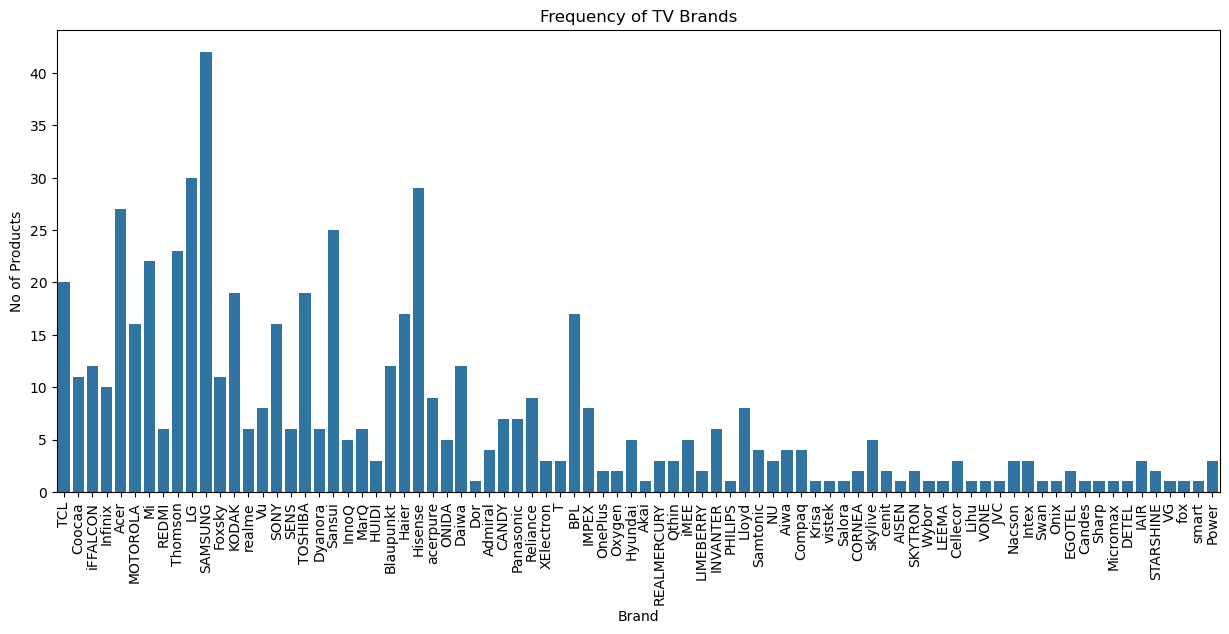

In [70]:
# Bar plot for 'Brand'
plt.figure(figsize=(15, 6))
sns.countplot(x='Brand', data=tv_df, ascending = false)
plt.title('Frequency of TV Brands')
plt.xlabel('Brand')
plt.ylabel('No of Products')
plt.xticks(rotation = 90)
plt.show()

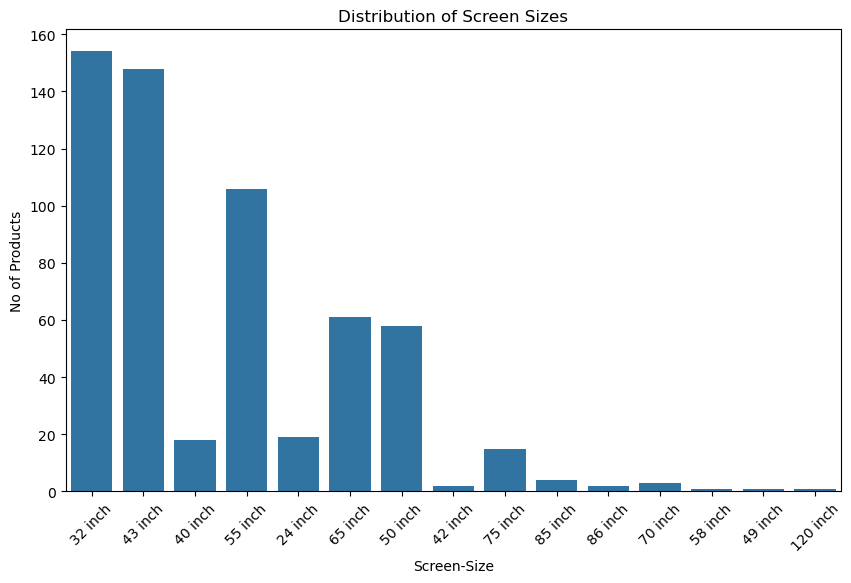

In [71]:
# Bar plot for 'Screen-Size'
plt.figure(figsize=(10, 6))
sns.countplot(x='Screen-Size', data=tv_df)
plt.title('Distribution of Screen Sizes')
plt.xlabel('Screen-Size')
plt.ylabel('No of Products')
plt.xticks(rotation = 45)
plt.show()

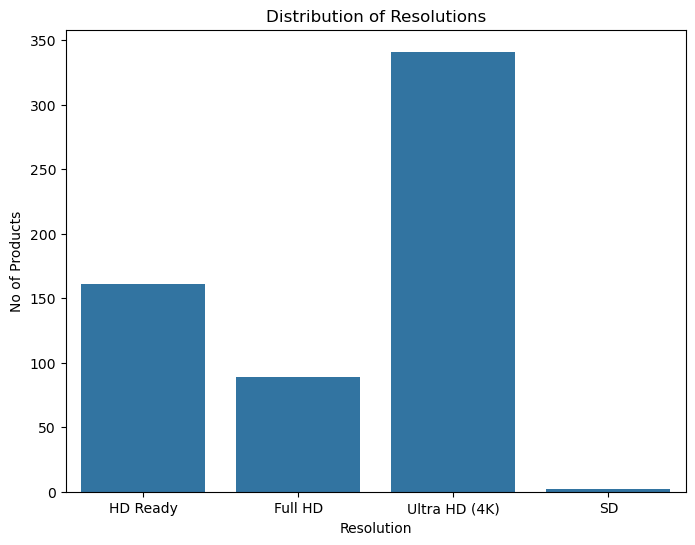

In [75]:
# Bar plot for 'Resolution'
plt.figure(figsize=(8, 6))
sns.countplot(x='Resolution', data=tv_df)
plt.title('Distribution of Resolutions')
plt.xlabel('Resolution')
plt.ylabel('No of Products')
#plt.xticks(rotation = 45)
plt.show()

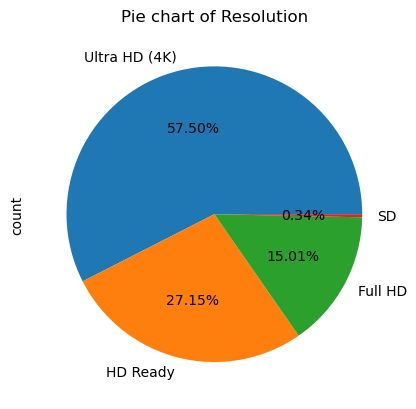

In [77]:
tv_df['Resolution'].value_counts().plot.pie(autopct = '%.2f%%')
plt.title("Pie chart of Resolution")
plt.show()

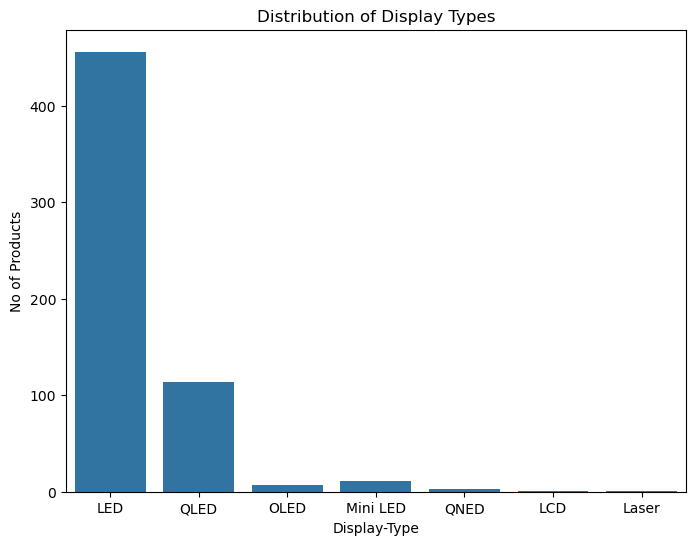

In [79]:
# Bar plot for 'Display-Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Display-Type', data=tv_df)
plt.title('Distribution of Display Types')
plt.xlabel('Display-Type')
plt.ylabel('No of Products')
#plt.xticks(rotation = 45)
plt.show()

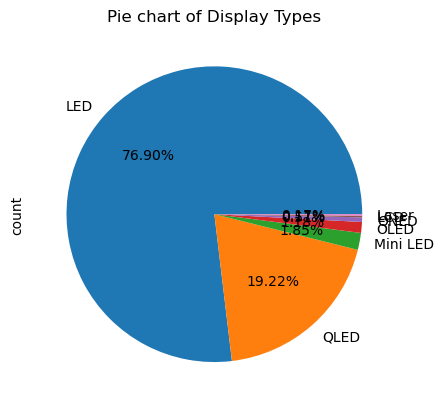

In [81]:
tv_df['Display-Type'].value_counts().plot.pie(autopct = '%.2f%%',startangle=0)
plt.title("Pie chart of Display Types")
plt.show()

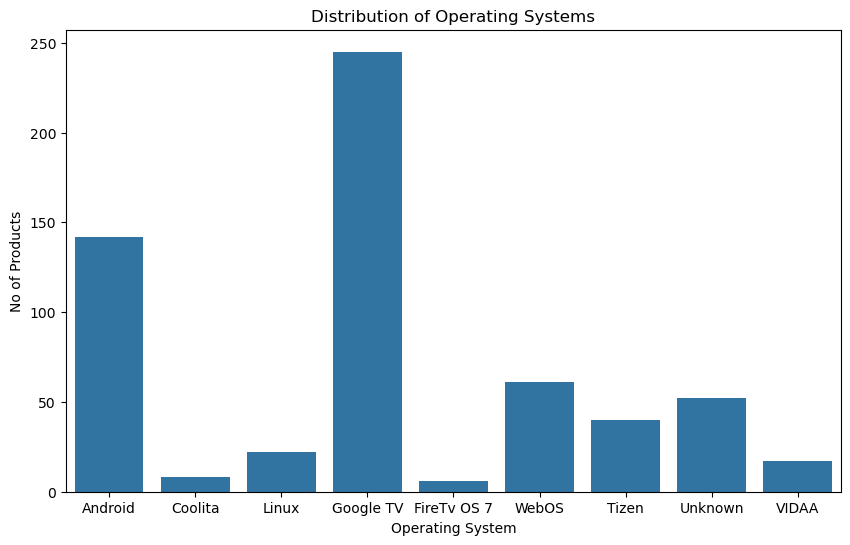

In [83]:
# Bar plot for 'Operating-System'
plt.figure(figsize=(10, 6))
sns.countplot(x='Operating-System', data=tv_df)
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('No of Products')
#plt.xticks(rotation = 45)
plt.show()

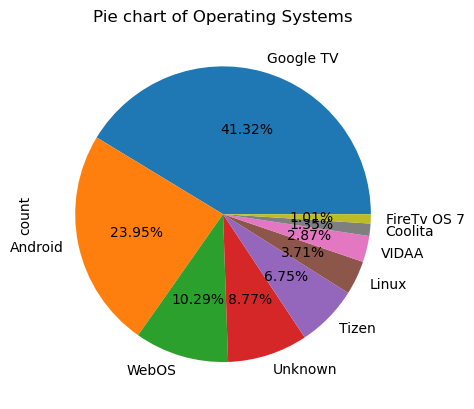

In [85]:
tv_df['Operating-System'].value_counts().plot.pie(autopct = '%.2f%%',startangle=0)
plt.title("Pie chart of Operating Systems")
plt.show()

#### Numerical Variables

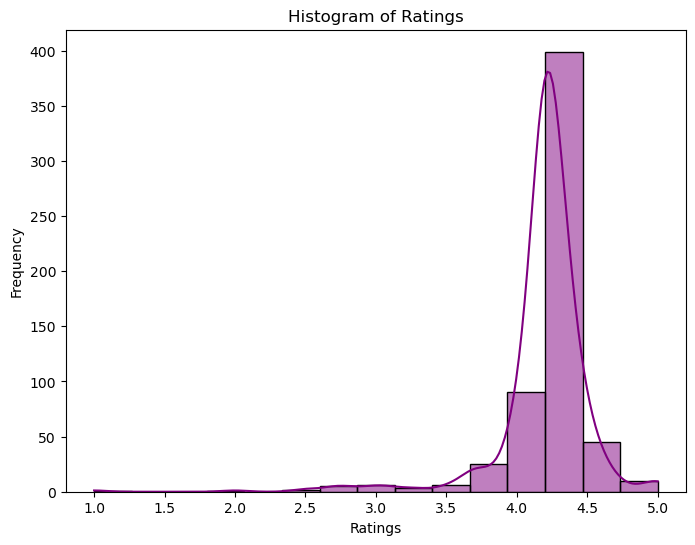

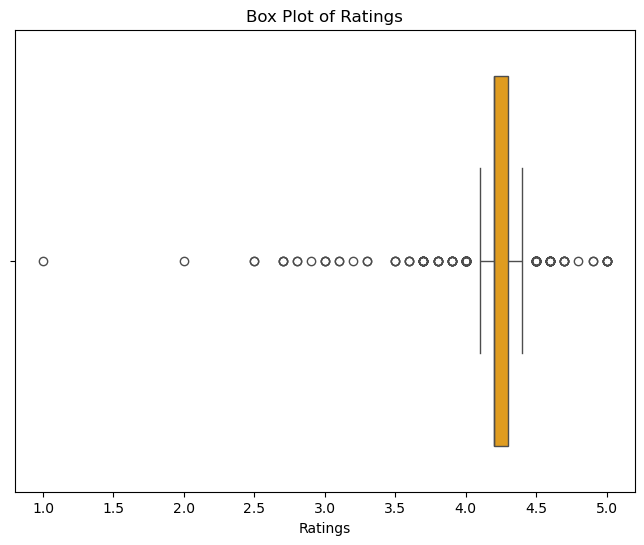

In [88]:
# Visualization for Ratings
plt.figure(figsize=(8, 6))
sns.histplot(tv_df['Rating'], bins=15, kde=True, color='purple')
plt.title("Histogram of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=tv_df, x='Rating', color='orange')
plt.title("Box Plot of Ratings")
plt.xlabel("Ratings")
plt.show()

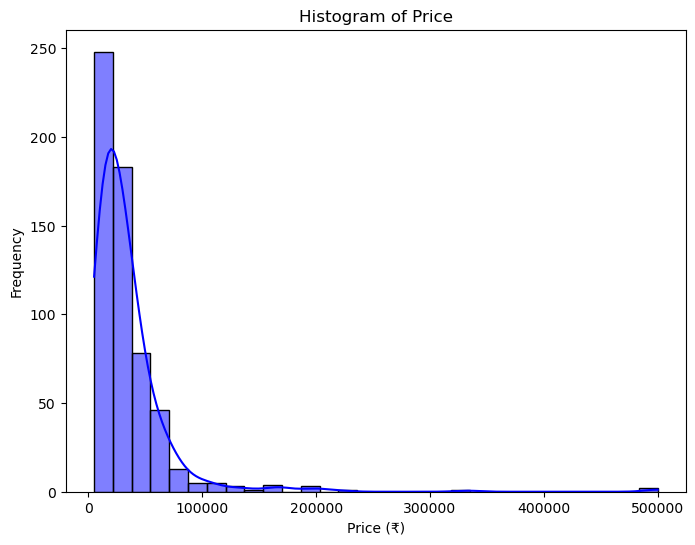

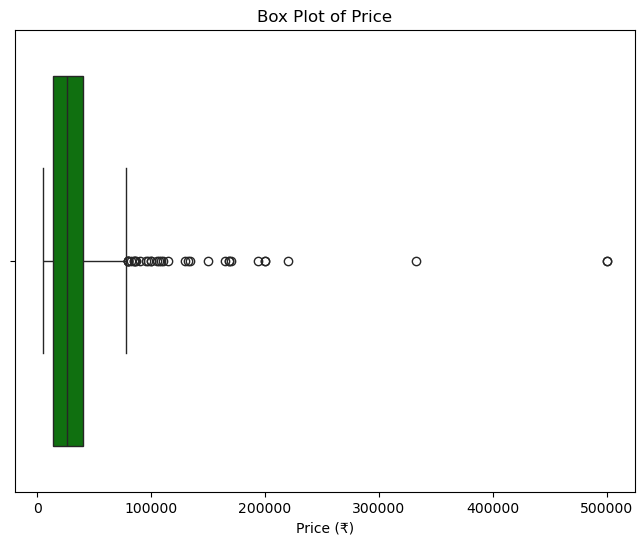

In [90]:
# Visualization for Price
plt.figure(figsize=(8, 6))
sns.histplot(tv_df['Price'], bins=30, kde=True, color='blue')
plt.title("Histogram of Price")
plt.xlabel("Price (₹)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=tv_df, x='Price', color='green')
plt.title("Box Plot of Price")
plt.xlabel("Price (₹)")
plt.show()

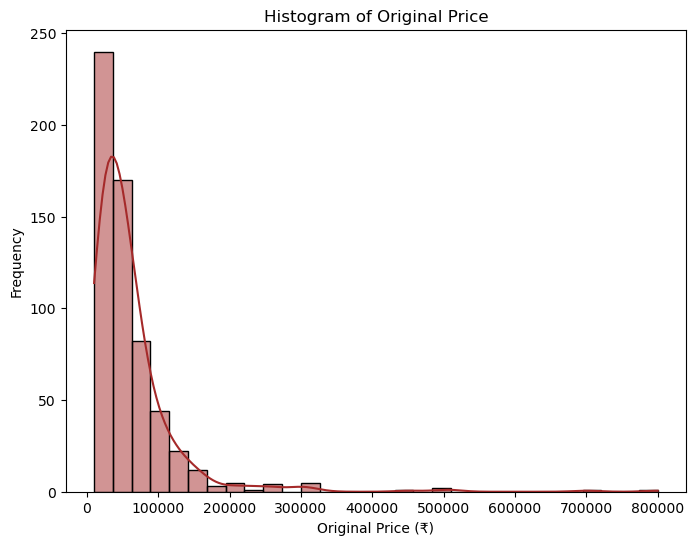

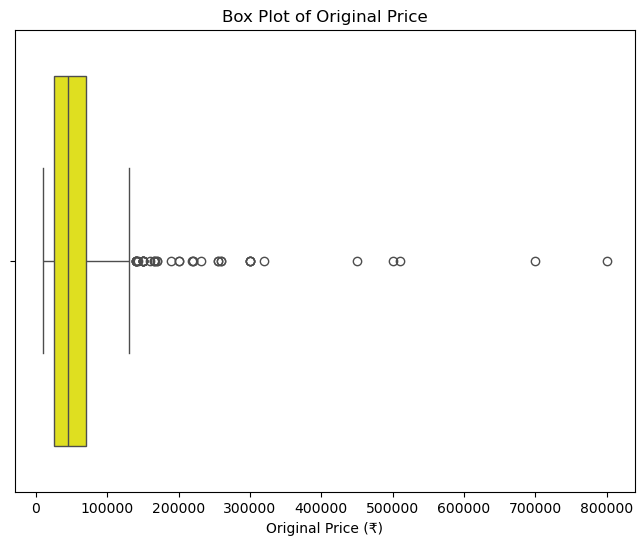

In [92]:
# Visualization for Original Price
plt.figure(figsize=(8, 6))
sns.histplot(tv_df['Original Price'], bins=30, kde=True, color='brown')
plt.title("Histogram of Original Price")
plt.xlabel("Original Price (₹)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=tv_df, x='Original Price', color='yellow')
plt.title("Box Plot of Original Price")
plt.xlabel("Original Price (₹)")
plt.show()

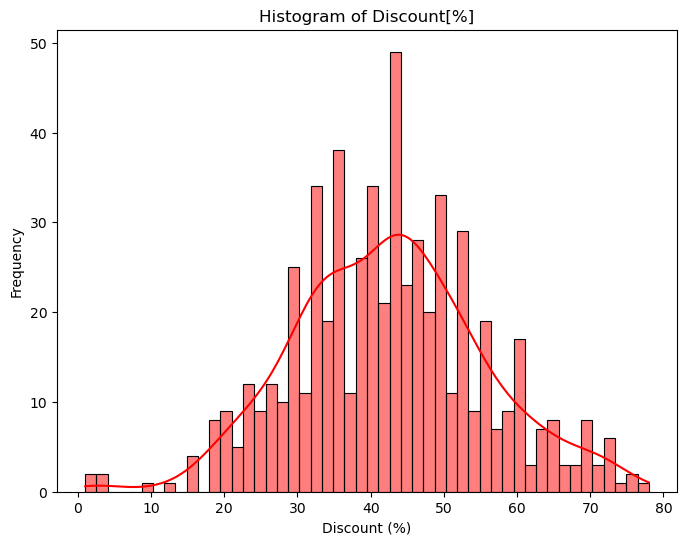

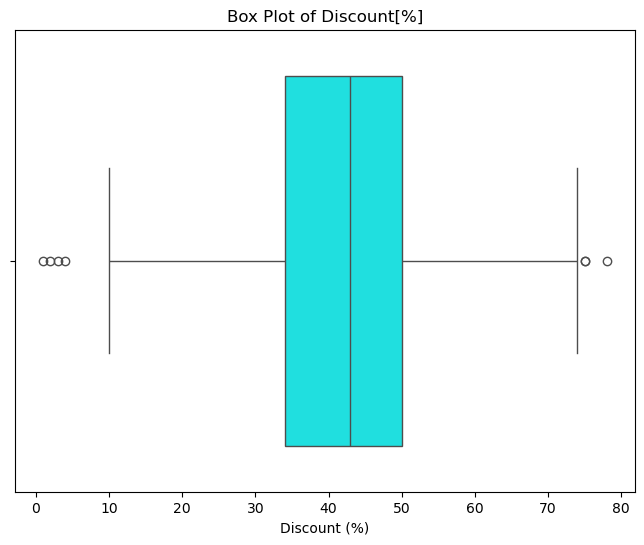

In [94]:
# Visualization for Discount[%]
plt.figure(figsize=(8, 6))
sns.histplot(tv_df['Discount Percent'], bins=50, kde=True, color='red')
plt.title("Histogram of Discount[%]")
plt.xlabel("Discount (%)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=tv_df, x='Discount Percent', color='cyan')
plt.title("Box Plot of Discount[%]")
plt.xlabel("Discount (%)")
plt.show()

### BiVariate/ Multivariate Analysis

#### Continuous(Numerical) vs Categorical variables

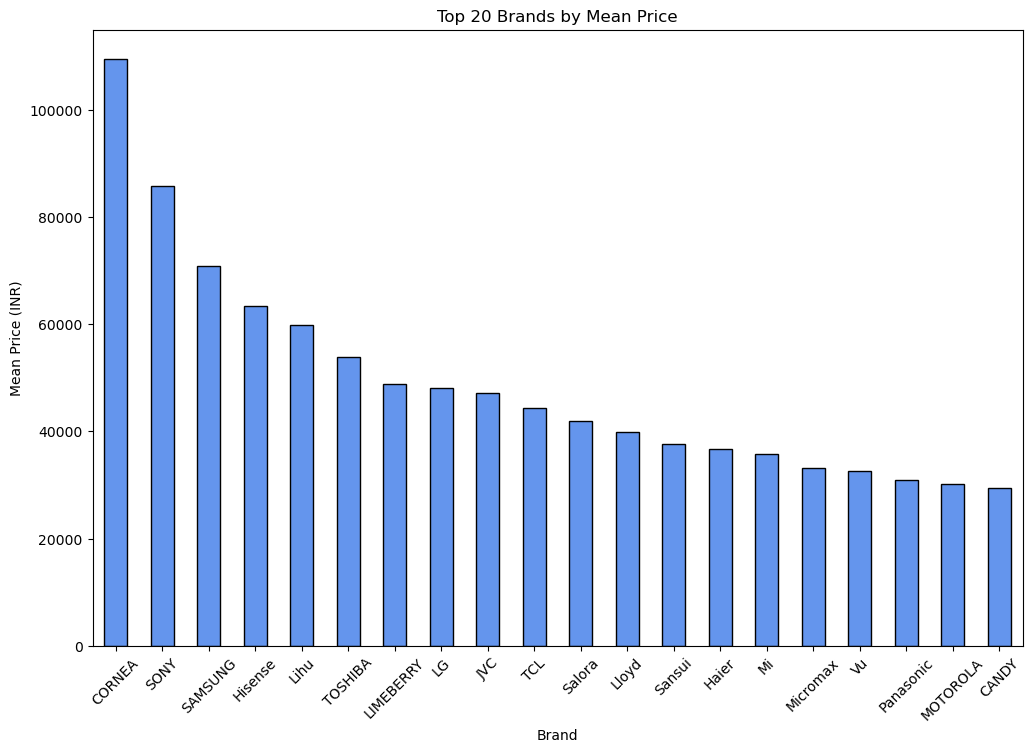

In [96]:
# Calculating mean price by brand
mean_price_by_brand = tv_df.groupby("Brand")["Price"].mean().sort_values(ascending=False)

# Plotting top 20 brands by mean price
top_20_brands = mean_price_by_brand.head(20)

plt.figure(figsize=(12, 8))
top_20_brands.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Top 20 Brands by Mean Price")
plt.xlabel("Brand")
plt.ylabel("Mean Price (INR)")
plt.xticks(rotation=45)
plt.show()

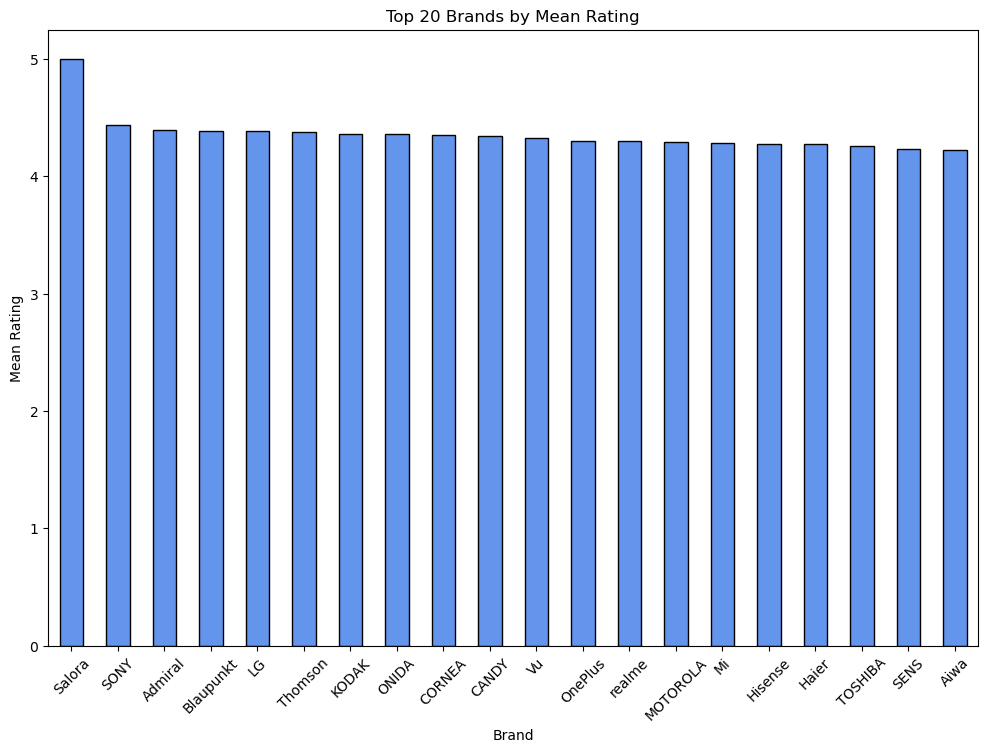

In [98]:
# Calculating mean rating by brand
mean_rating_by_brand = tv_df.groupby("Brand")["Rating"].mean().sort_values(ascending=False)

# Plotting top 20 brands by mean rating
top_20_brands1 = mean_rating_by_brand.head(20)

plt.figure(figsize=(12, 8))
top_20_brands1.plot(kind="bar", color="cornflowerblue", edgecolor="black")
plt.title("Top 20 Brands by Mean Rating")
plt.xlabel("Brand")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45)
plt.show()

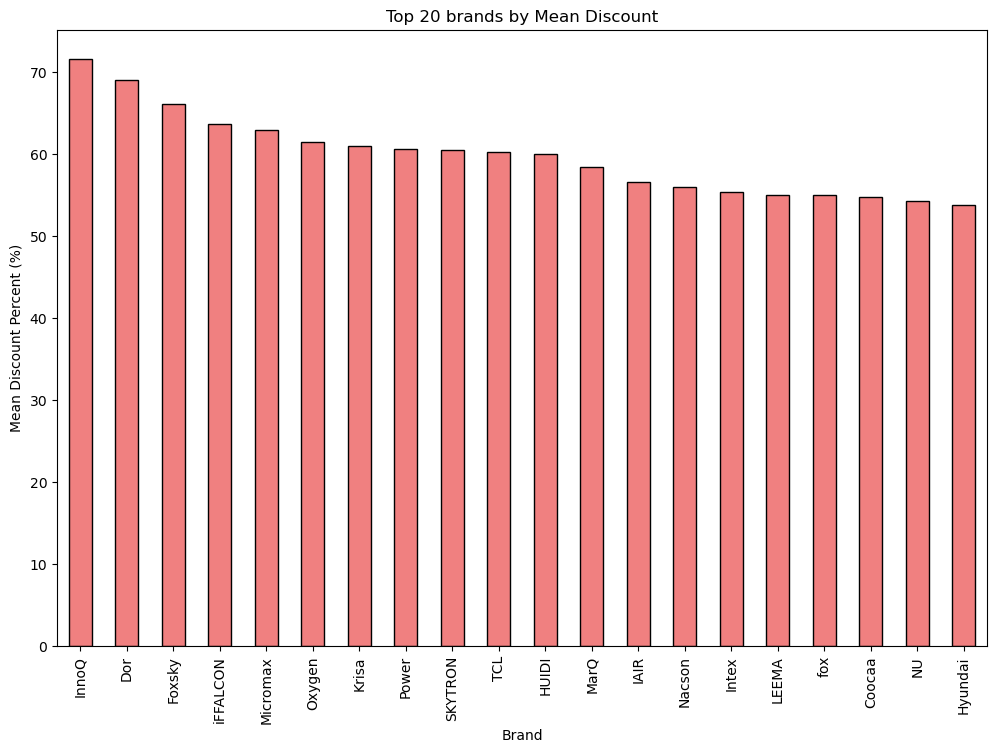

In [100]:
# Calculating mean discount percent by brand
mean_discount_by_brand = tv_df.groupby("Brand")["Discount Percent"].mean().sort_values(ascending=False)

# Plotting top 20 brands by mean rating
top_20_brands2 = mean_discount_by_brand.head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_20_brands2.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.title("Top 20 brands by Mean Discount")
plt.xlabel("Brand")
plt.ylabel("Mean Discount Percent (%)")
plt.xticks(rotation=90)
plt.show()

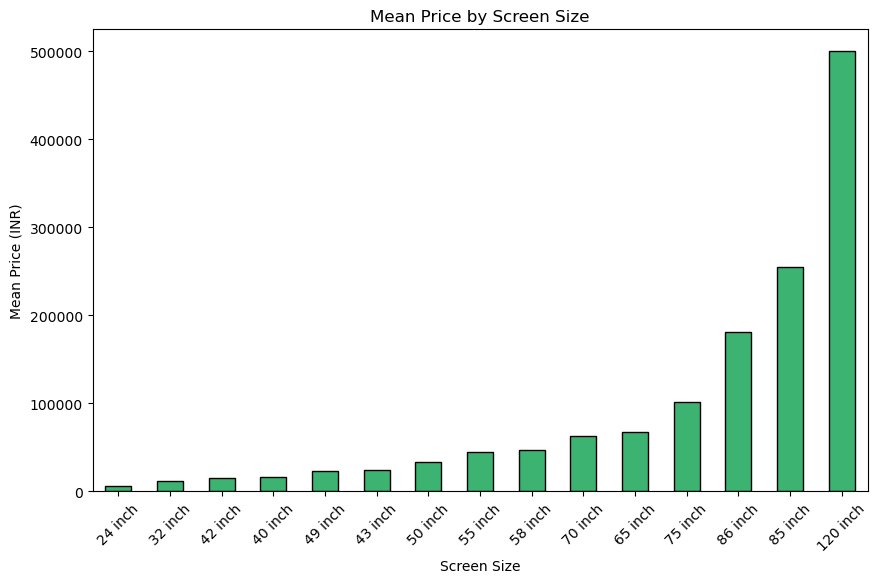

In [102]:
# Aggregating mean price by screen size
mean_price_by_screen_size = tv_df.groupby("Screen-Size")["Price"].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
mean_price_by_screen_size.plot(kind="bar", color="mediumseagreen", edgecolor="black")
plt.title("Mean Price by Screen Size")
plt.xlabel("Screen Size")
plt.ylabel("Mean Price (INR)")
plt.xticks(rotation=45)
plt.show()

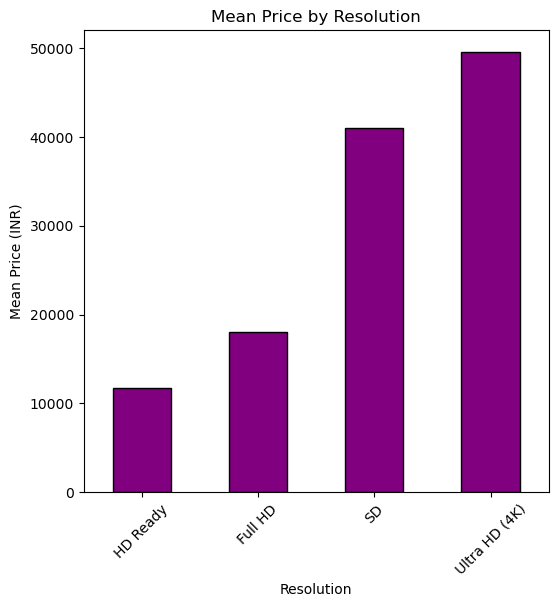

In [104]:
# Aggregating mean price by Resolution
mean_price_by_resolution = tv_df.groupby("Resolution")["Price"].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(6, 6))
mean_price_by_resolution.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Mean Price by Resolution")
plt.xlabel("Resolution")
plt.ylabel("Mean Price (INR)")
plt.xticks(rotation=45)
plt.show()

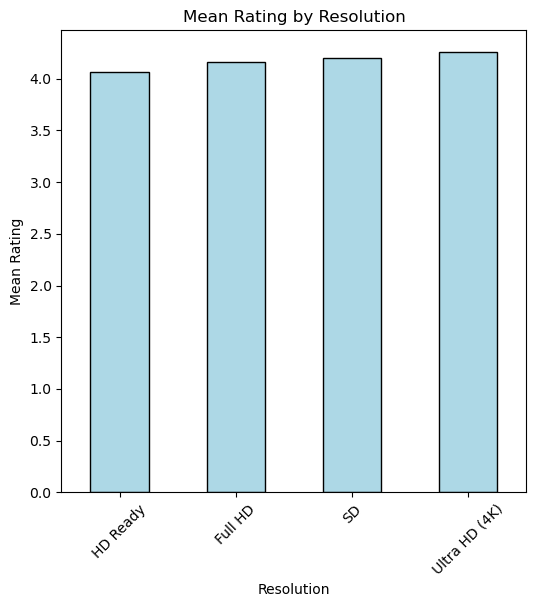

In [106]:
# Aggregating mean Rating by Resolution
mean_rating_by_resolution = tv_df.groupby("Resolution")["Rating"].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(6, 6))
mean_rating_by_resolution.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Mean Rating by Resolution")
plt.xlabel("Resolution")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45)
plt.show()

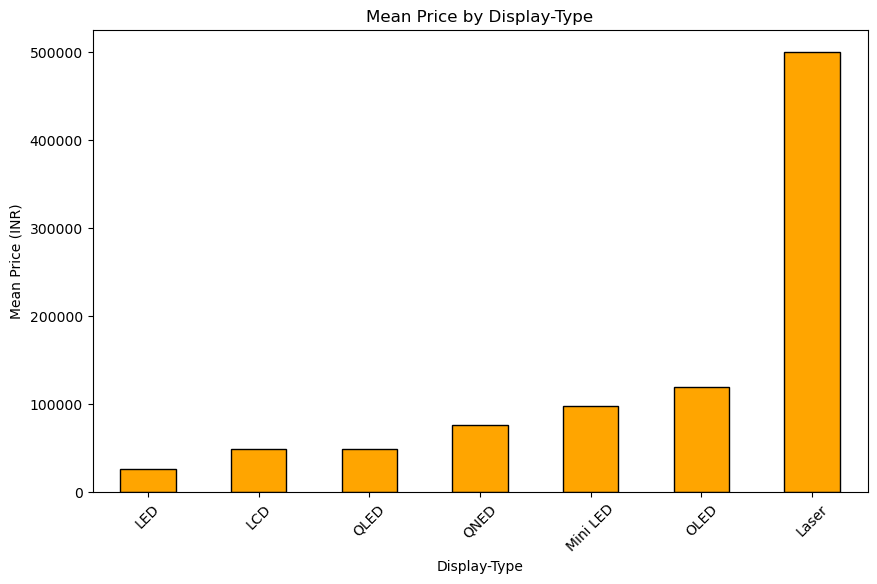

In [108]:
# Aggregating mean price by Display-Type
mean_price_by_display_type = tv_df.groupby("Display-Type")["Price"].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
mean_price_by_display_type.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Mean Price by Display-Type")
plt.xlabel("Display-Type")
plt.ylabel("Mean Price (INR)")
plt.xticks(rotation=45)
plt.show()

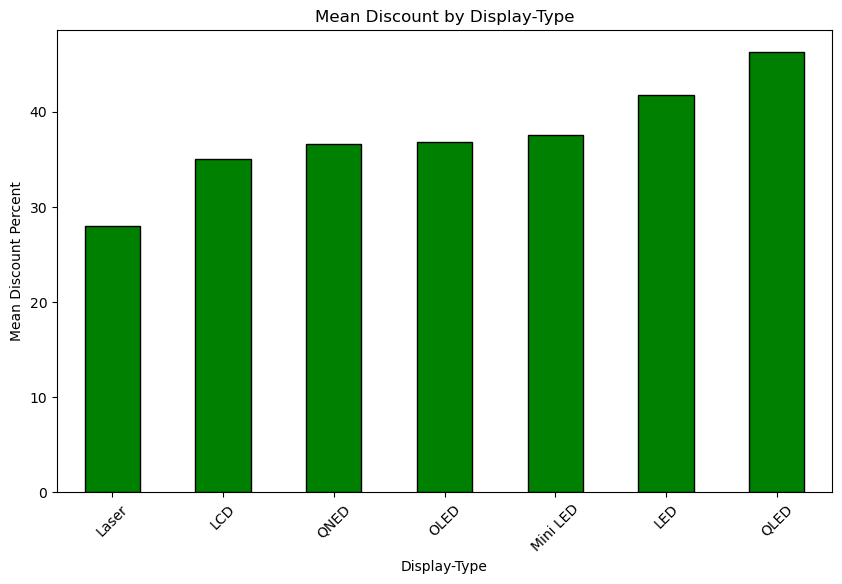

In [110]:
# Aggregating mean discount by Display-Type
mean_discount_by_display_type = tv_df.groupby("Display-Type")["Discount Percent"].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
mean_discount_by_display_type.plot(kind="bar", color="green", edgecolor="black")
plt.title("Mean Discount by Display-Type")
plt.xlabel("Display-Type")
plt.ylabel("Mean Discount Percent")
plt.xticks(rotation=45)
plt.show()

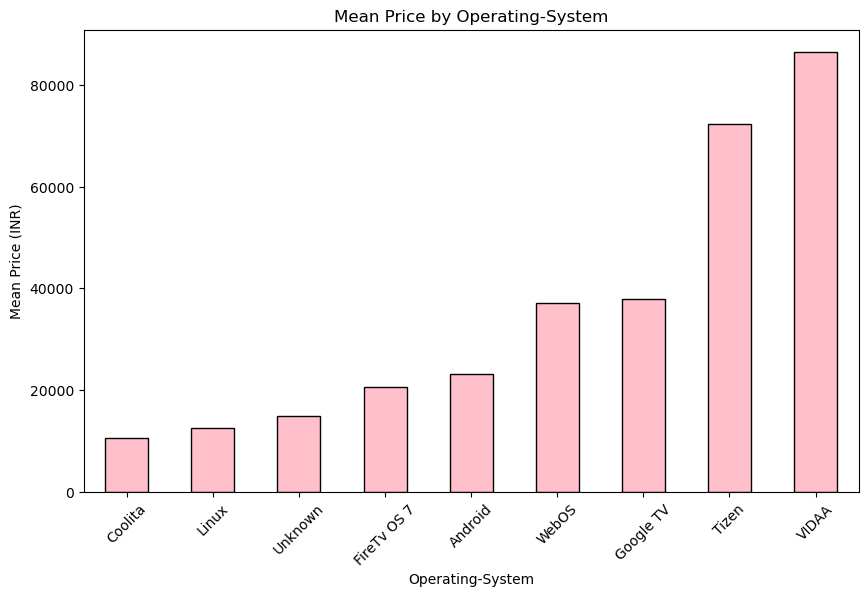

In [112]:
# Aggregating mean price by Operating-System
mean_price_by_operating_system = tv_df.groupby("Operating-System")["Price"].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
mean_price_by_operating_system.plot(kind="bar", color="pink", edgecolor="black")
plt.title("Mean Price by Operating-System")
plt.xlabel("Operating-System")
plt.ylabel("Mean Price (INR)")
plt.xticks(rotation=45)
plt.show()

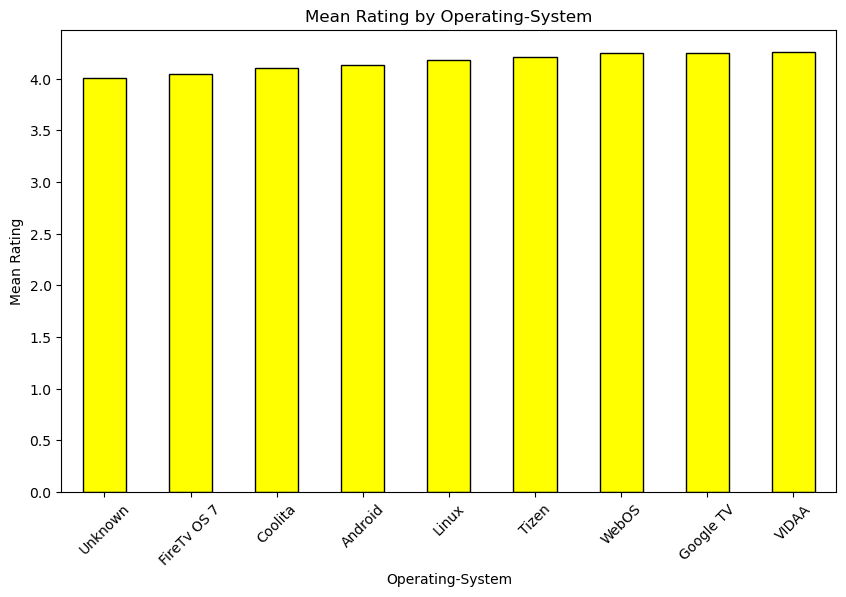

In [114]:
# Aggregating mean rating by Operating-System
mean_rating_by_operating_system = tv_df.groupby("Operating-System")["Rating"].mean().sort_values(ascending=True)

# Plotting
plt.figure(figsize=(10, 6))
mean_rating_by_operating_system.plot(kind="bar", color="yellow", edgecolor="black")
plt.title("Mean Rating by Operating-System")
plt.xlabel("Operating-System")
plt.ylabel("Mean Rating")
plt.xticks(rotation=45)
plt.show()

#### Continuous to Continuous variable (Numerical vs Numerical)

In [117]:
tv_df.head()

,Brand,Screen-Size,Resolution,Display-Type,Operating-System,Rating,Number of Ratings,Reviews,Price,Original Price,Discount Percent
0,TCL,32 inch,HD Ready,LED,Android,4.1,24978,2097,8990.0,20990.0,57.0
1,Coocaa,43 inch,Full HD,LED,Coolita,4.2,23348,2744,11499.0,29999.0,61.0
2,iFFALCON,32 inch,HD Ready,LED,Android,4.2,68411,7625,8999.0,19990.0,54.0
3,Infinix,32 inch,HD Ready,LED,Linux,4.2,49455,5180,8499.0,16999.0,50.0
4,iFFALCON,43 inch,Ultra HD (4K),LED,Google TV,4.2,68411,7625,19999.0,50990.0,60.0


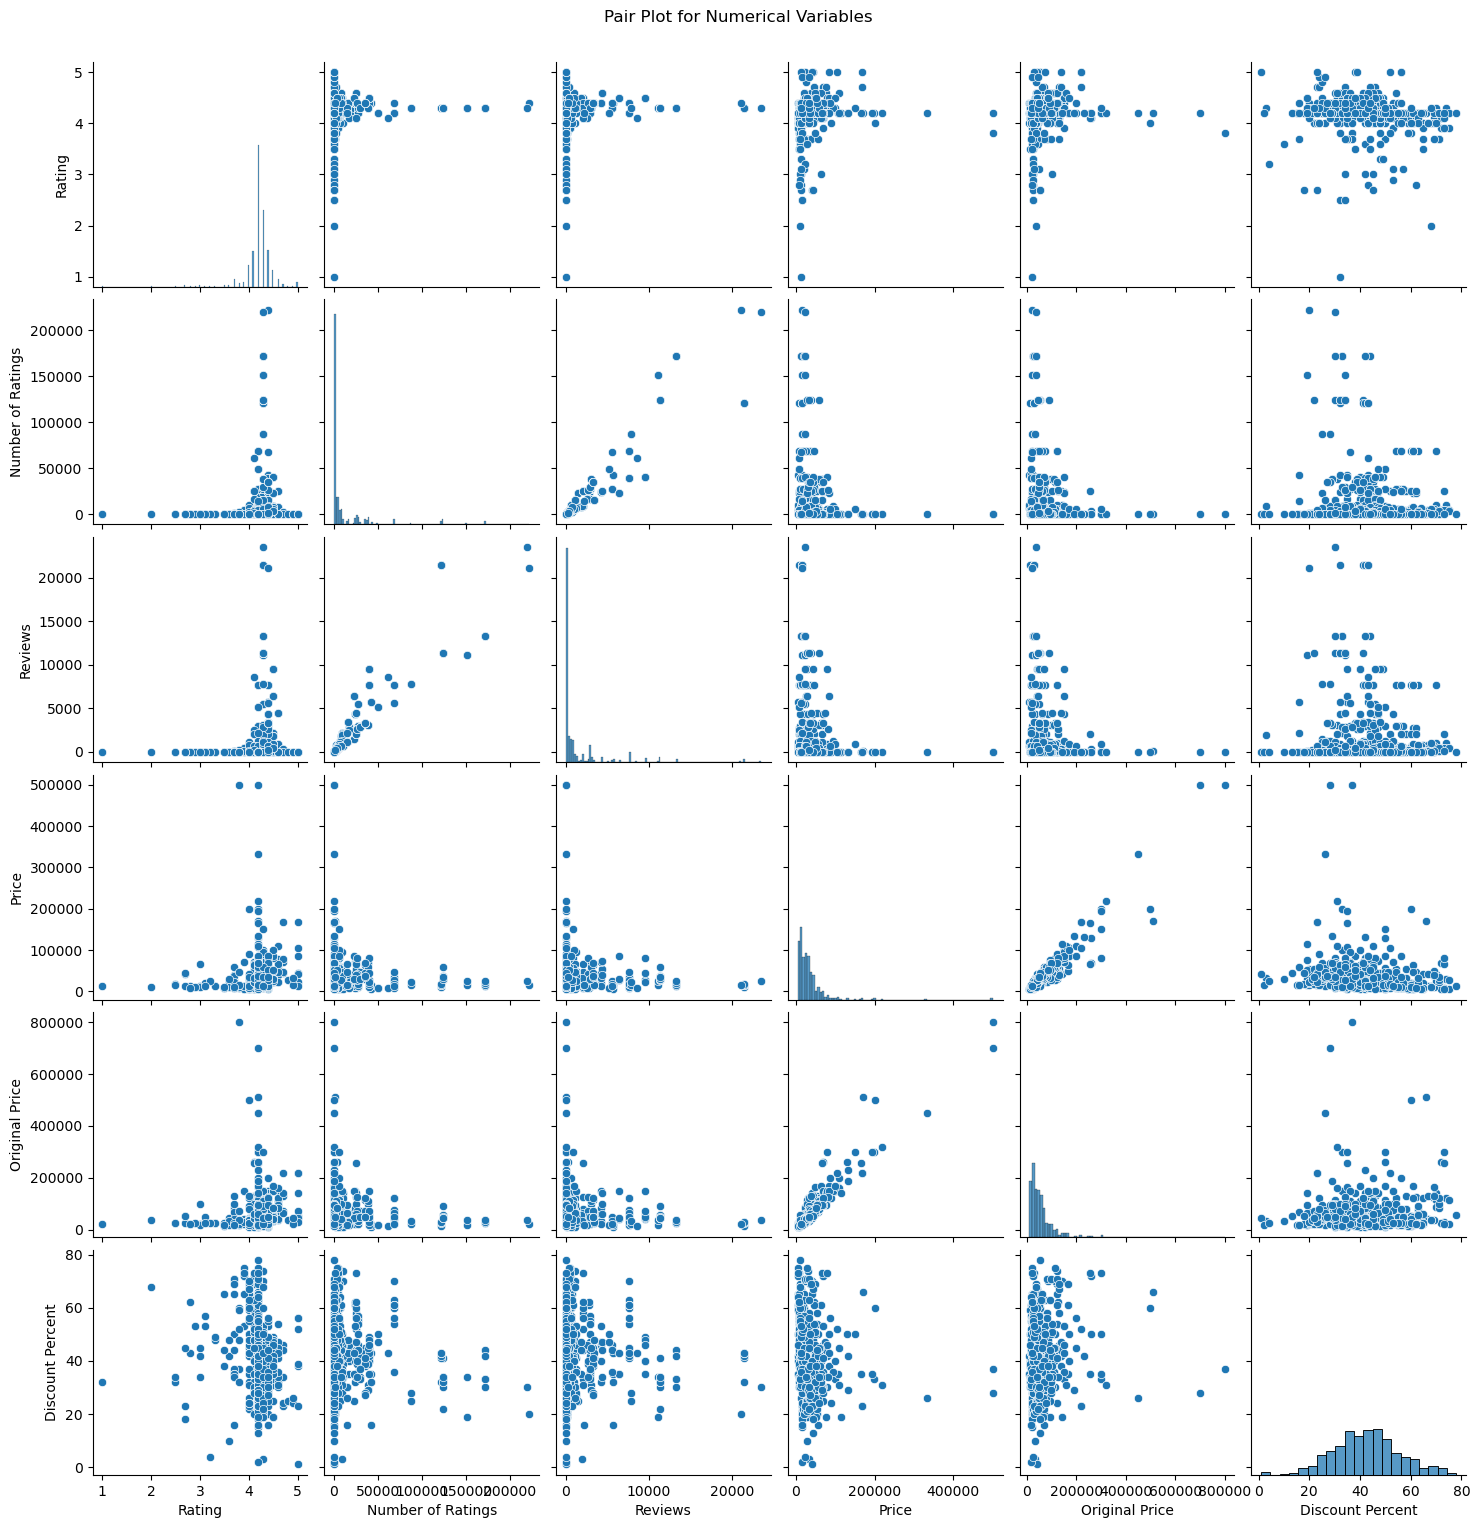

In [119]:
# Pair plot to see the relationships between multiple numerical variables
sns.pairplot(tv_df[['Rating', 'Number of Ratings', 'Reviews', 'Price', 'Original Price', 'Discount Percent']])
plt.suptitle('Pair Plot for Numerical Variables', y=1.02)
plt.show()

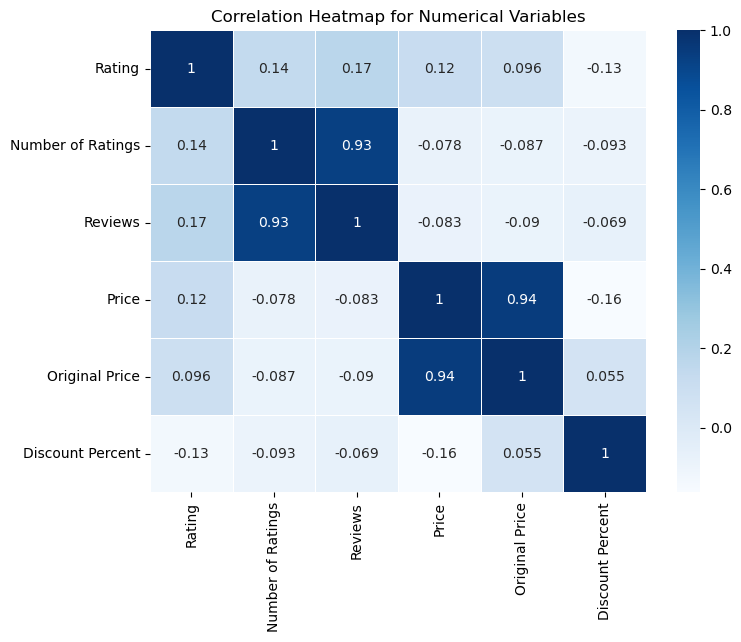

In [121]:
# Compute correlation matrix for numerical columns
correlation_matrix = tv_df[['Rating', 'Number of Ratings', 'Reviews', 'Price', 'Original Price', 'Discount Percent']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

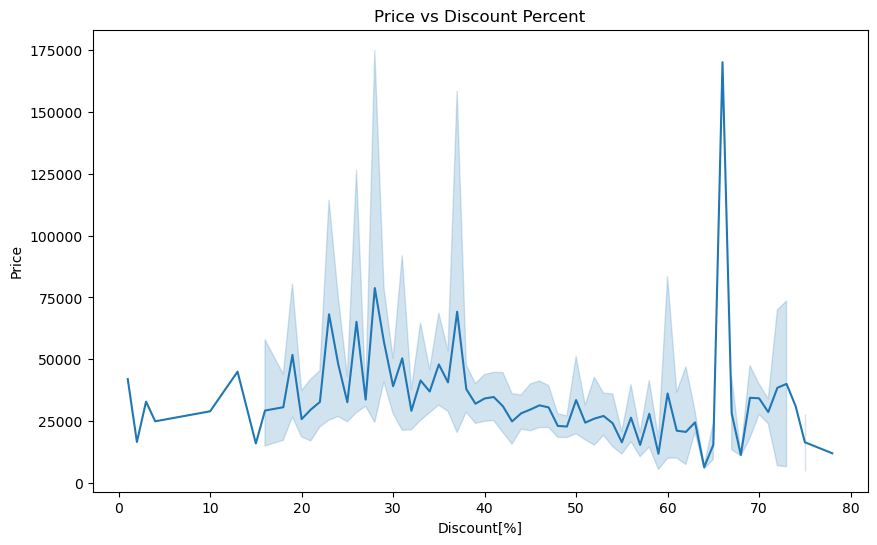

In [123]:
# Line plot for Price over Discount[%]
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount Percent', y='Price', data=tv_df)
plt.title('Price vs Discount Percent')
plt.xlabel('Discount[%]')
plt.ylabel('Price')
plt.show()

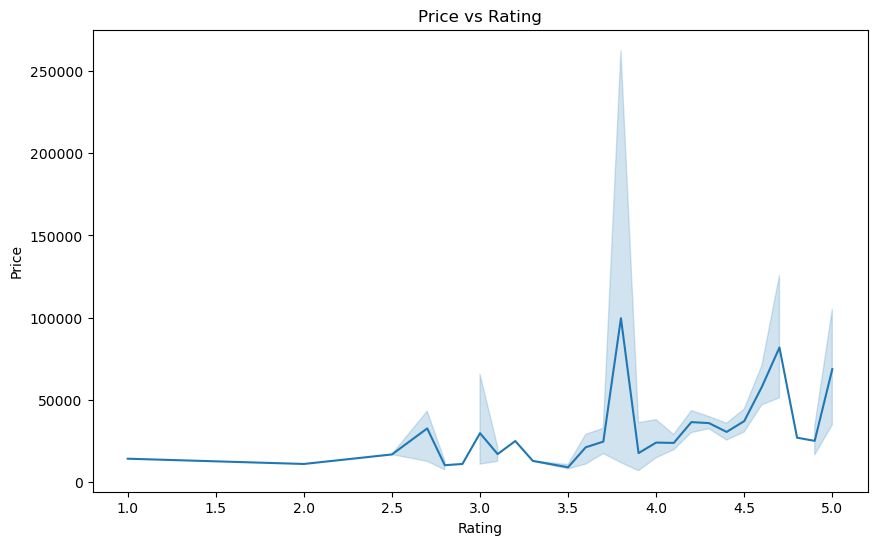

In [125]:
# Line plot for Price over Rating
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rating', y='Price', data=tv_df)
plt.title('Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

In [127]:
tv_df.nunique()

Brand                 82
Screen-Size           15
Resolution             4
Display-Type           7
Operating-System       9
Rating                26
Number of Ratings    191
Reviews              151
Price                316
Original Price       271
Discount Percent      67
dtype: int64

#### Categorical to Categorical variables

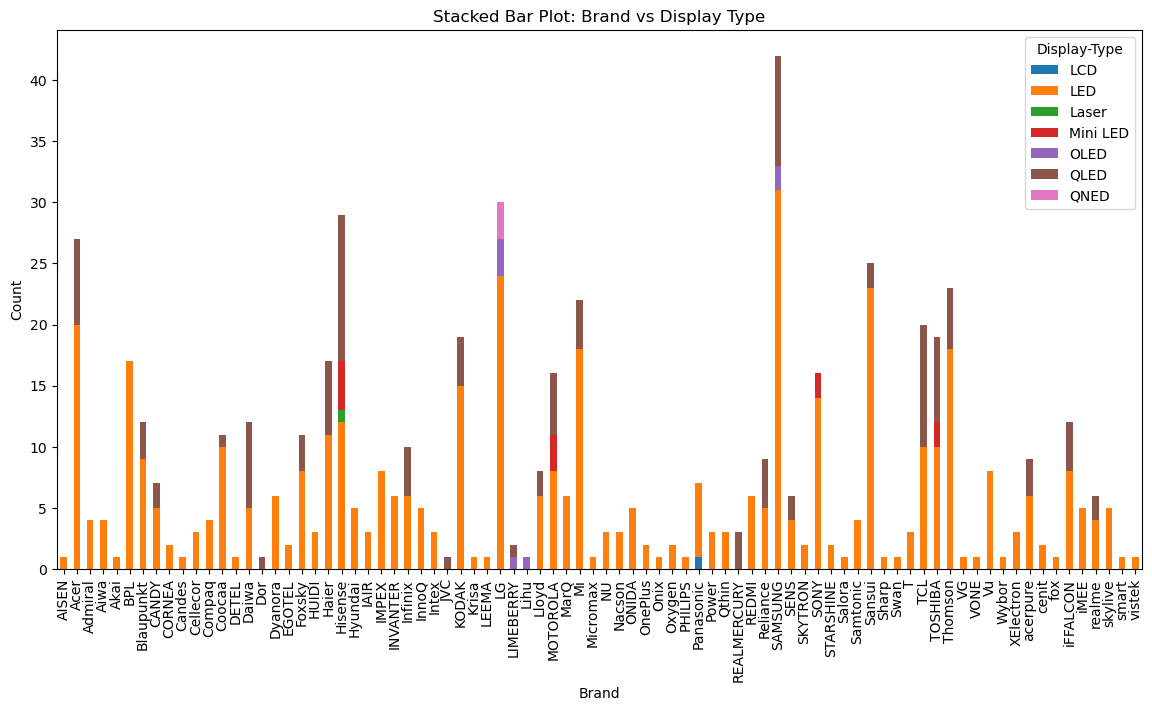

In [130]:
# Stacked Bar Plot for Brand vs Display-Type
import pandas as pd
import matplotlib.pyplot as plt

# Create a contingency table
pivot_brand_display = pd.crosstab(tv_df['Brand'], tv_df['Display-Type'])

# Plot stacked bar chart
pivot_brand_display.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title("Stacked Bar Plot: Brand vs Display Type")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


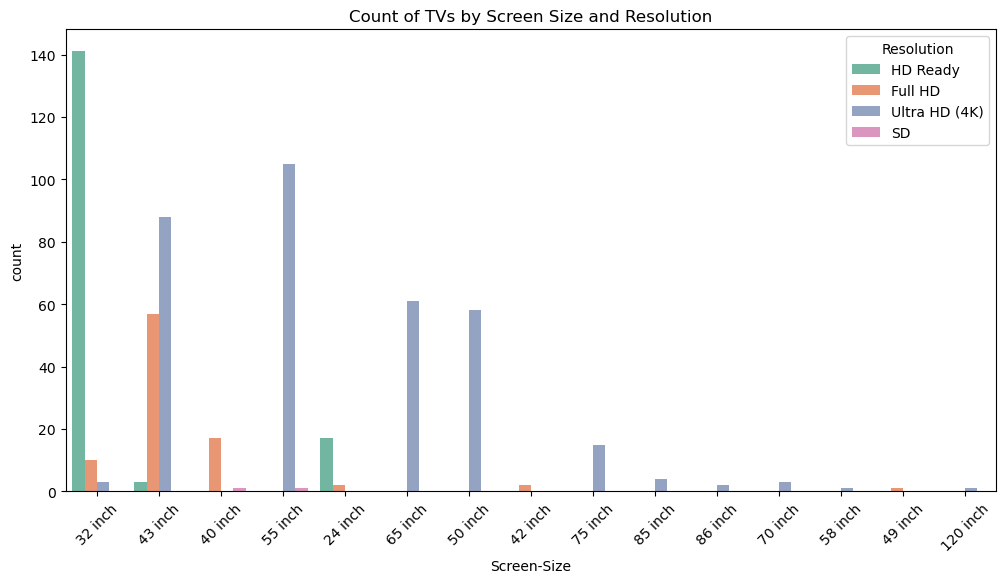

In [132]:
# Count plot for Screen-Size vs Resolution
plt.figure(figsize=(12, 6))
sns.countplot(data=tv_df, x='Screen-Size', hue='Resolution', palette='Set2')
plt.title("Count of TVs by Screen Size and Resolution")
plt.xticks(rotation=45)
plt.show()


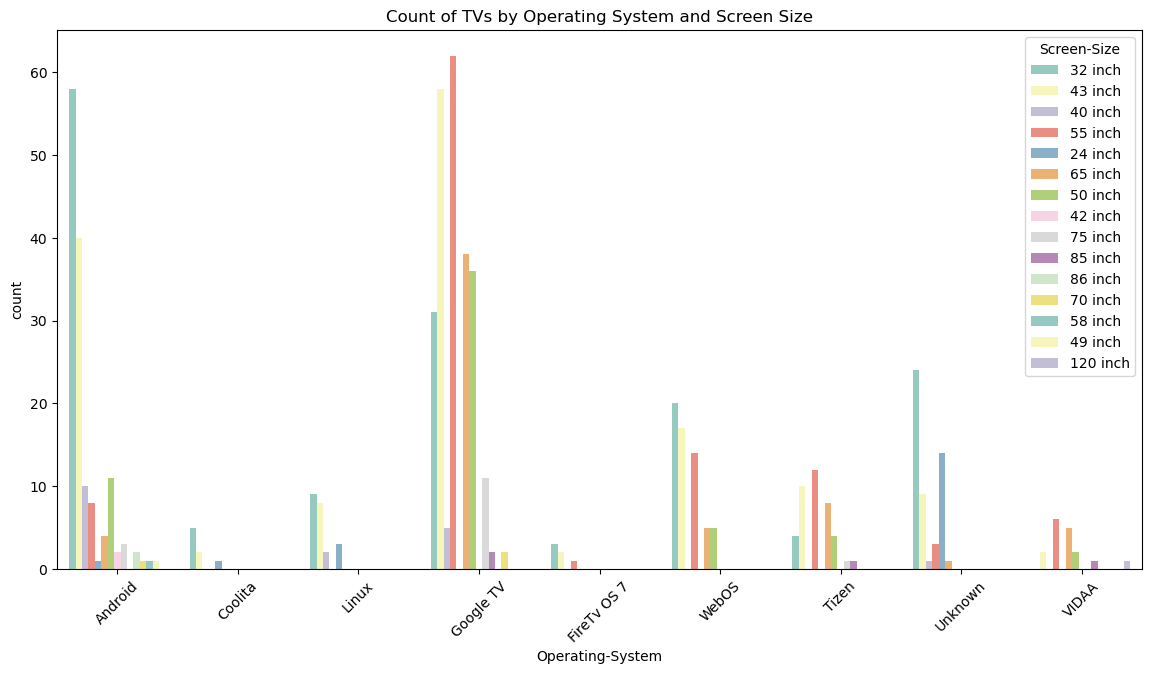

In [134]:
# Stacked Bar Plot for Operating-System vs Screen-Size
plt.figure(figsize=(14, 7))
sns.countplot(data=tv_df, x='Operating-System', hue='Screen-Size', palette='Set3')
plt.title("Count of TVs by Operating System and Screen Size")
plt.xticks(rotation=45)
plt.show()


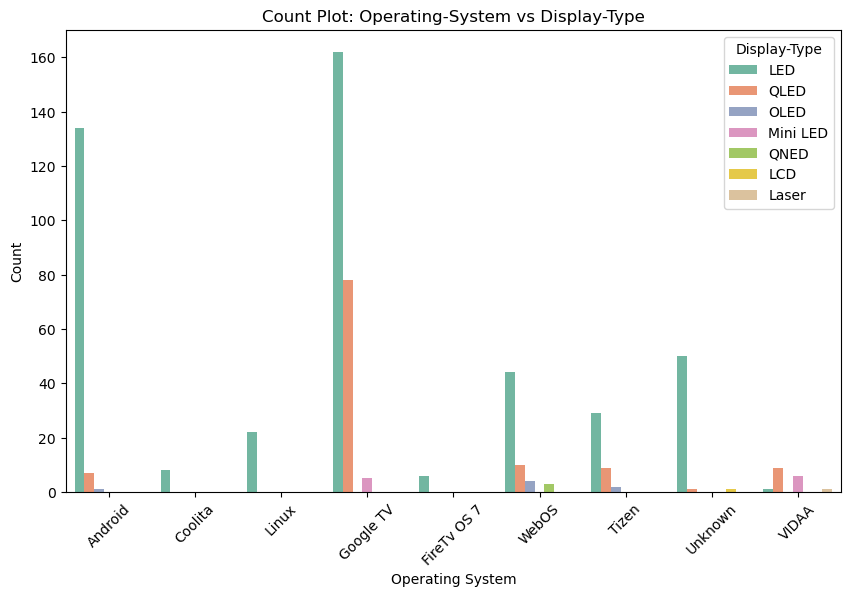

In [136]:
# Count plot for Operating-System vs Display-Type
plt.figure(figsize=(10, 6))
sns.countplot(x='Operating-System', hue='Display-Type', data=tv_df, palette='Set2')
plt.title('Count Plot: Operating-System vs Display-Type')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


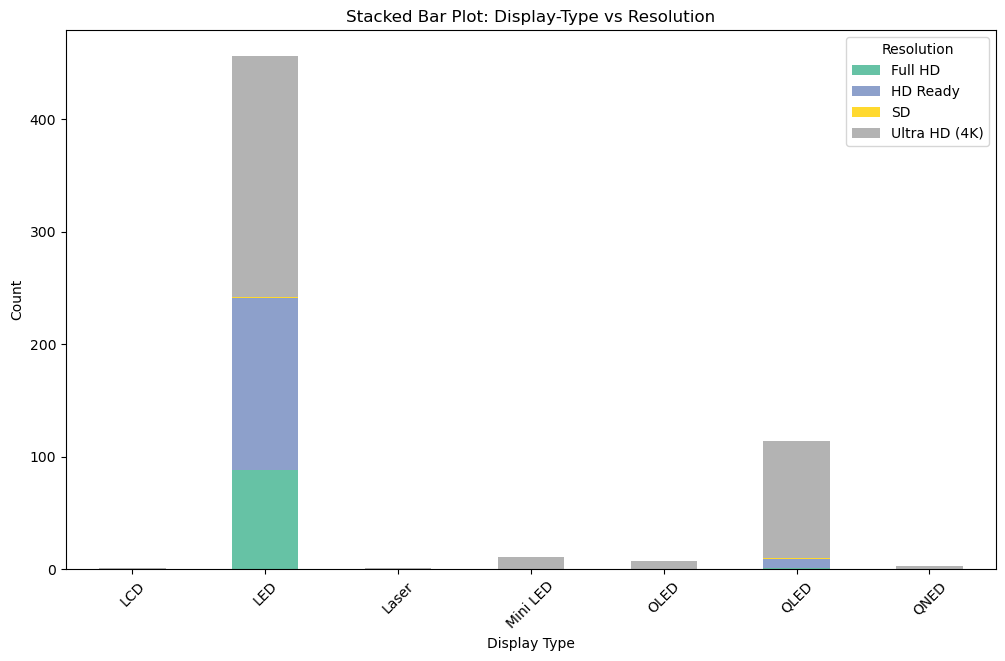

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pivot table for Display-Type vs Resolution
pivot_display_resolution = pd.crosstab(tv_df['Display-Type'], tv_df['Resolution'])

# Plotting stacked bar chart
pivot_display_resolution.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set2')

# Adding titles and labels
plt.title("Stacked Bar Plot: Display-Type vs Resolution")
plt.xlabel("Display Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Resolution")

# Display the plot
plt.show()


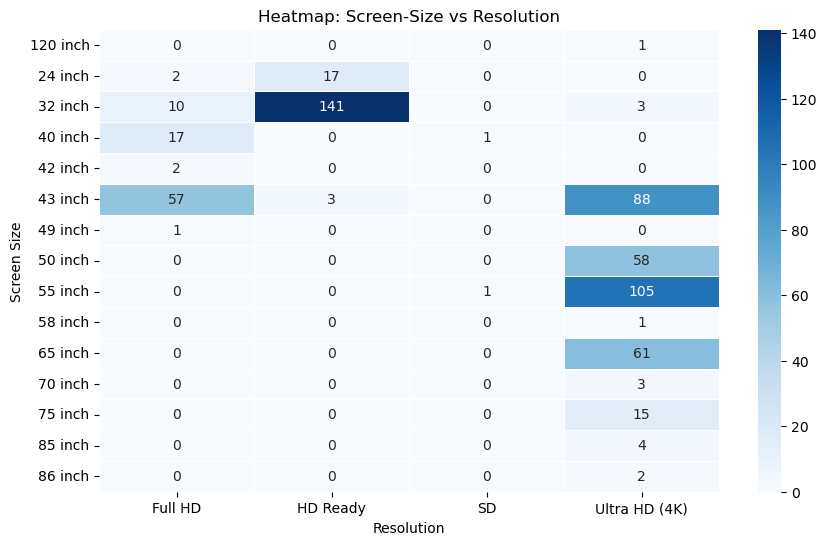

In [140]:
# Create a pivot table for Screen-Size vs Resolution
screen_resolution_table = pd.crosstab(tv_df['Screen-Size'], tv_df['Resolution'])
plt.figure(figsize=(10, 6))
sns.heatmap(screen_resolution_table, annot=True, cmap='Blues', fmt="d", linewidths=0.5)
plt.title('Heatmap: Screen-Size vs Resolution')
plt.ylabel('Screen Size')
plt.xlabel('Resolution')
plt.show()
